In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.show()

In [6]:
listings=pd.read_csv('listings_eat_cleaned.csv')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 16 columns):
Unnamed: 0          720 non-null int64
Unnamed: 0.1        720 non-null int64
Company Name        720 non-null object
Company ID          720 non-null int64
Rating              720 non-null float64
Offer               720 non-null object
Details             720 non-null object
Original Price      720 non-null float64
Sale Price          720 non-null float64
percent_savings     718 non-null float64
Num_bought          720 non-null int64
Num_outlets         720 non-null int64
Outlet Names        720 non-null object
Offer start date    720 non-null object
Date retrieved      720 non-null object
Offer Age           720 non-null int64
dtypes: float64(4), int64(6), object(6)
memory usage: 90.1+ KB


In [ ]:
# Remove useless columns

listings.drop(labels=['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [29]:
# Add extra columns

listings['absolute_savings']=listings['Original Price']-listings['Sale Price']


,Company Name,Company ID,Rating,Offer,Details,Original Price,Sale Price,percent_savings,Num_bought,Num_outlets,Outlet Names,Offer start date,Date retrieved,Offer Age,absolute_savings
0,Charcoal Thai,2447,4.0,Mookata Lunch / Dinner Set for 1 Person,Enjoy both hot pot and barbecue at the same ti...,46.96,9.00,81.0,10313,3,"['#03-07, VivoCity', '#B1/ NEX', '321 Clementi']",2017-08-11,2018-03-02,203,37.96
1,The Landmark,2725,4.1,(Mon - Thu) Dinner Buffet for 1 Adult,Gather loved ones and pillage through a vast s...,49.00,27.00,45.0,8377,1,['Village Hotel Bugis'],2017-09-25,2018-03-02,158,22.00
2,The Landmark,2725,4.1,(Fri - Sun & PH) International Dinner Buffet f...,Gather loved ones and pillage through a vast s...,59.00,32.90,44.0,6781,1,['Village Hotel Bugis'],2017-09-25,2018-03-02,158,26.10
3,The Landmark,2725,4.1,Daily Lunch Buffet for 1 Adult,Gather loved ones and pillage through a vast s...,42.90,24.90,42.0,6392,1,['Village Hotel Bugis'],2017-09-25,2018-03-02,158,18.00
4,Ji De Chi,3722,4.2,Mango Sweet-in-Heart with One (1) Topping,Cool off from the tropical weather with a refr...,6.50,3.90,40.0,6387,7,"['#B2-53, Plaza Singapura', '#02-K02, The Cent...",2017-08-02,2018-03-02,212,2.60
5,QQ Rice,3805,4.3,Oat Rice Set Meal with Organic Soya Drink for ...,Treat yourself to a healthy set meal consistin...,7.20,5.00,31.0,5143,12,"[' B1-07, One Raffles Place', 'Alexandra Retai...",2018-01-04,2018-03-02,57,2.20
6,QQ Rice,3805,4.3,Spiced Chicken and Oat Rice Bento Box + Organi...,Give your meal a healthy twist with a chicken ...,8.90,6.60,26.0,5136,12,"[' B1-07, One Raffles Place', 'Alexandra Retai...",2017-08-16,2018-03-02,198,2.30
7,Tea Valley,1239,4.3,Two (2) Rice/Noodle with Two (2) Bubble Teas f...,Enjoy a lunch or dinner meal with this set tha...,21.40,12.80,40.0,4987,3,"['#01-340, Downtown East', '#B1-47, Clarke Qua...",2017-07-22,2018-03-02,223,8.60
8,Steamov,4672,4.5,Mini Steamboat Hotpot Set for 1 Person,Who doesn't like a good hotpot? Indulge in a m...,23.50,13.00,45.0,4411,1,['Steamov @ New Bridge Road'],2017-12-04,2018-03-02,88,10.50
9,Charcoal Thai,2447,4.0,Mookata Dinner Buffet for 1 Person,Enjoy both hot pot and barbecue at the same ti...,28.18,16.90,40.0,3603,2,"['#B1/ NEX', '321 Clementi']",2017-08-11,2018-03-02,203,11.28


(array([666.,  32.,  10.,   3.,   4.,   0.,   3.,   0.,   1.,   1.]),
 array([9.0000e+00, 1.0394e+03, 2.0698e+03, 3.1002e+03, 4.1306e+03,
        5.1610e+03, 6.1914e+03, 7.2218e+03, 8.2522e+03, 9.2826e+03,
        1.0313e+04]),
 <a list of 10 Patch objects>)

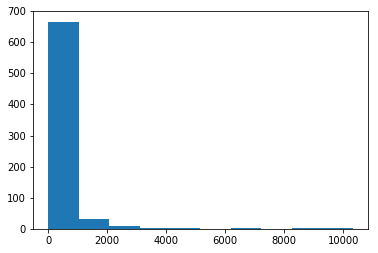

In [39]:
# EDA

plt.hist(x=listings['Num_bought'],bins=10)

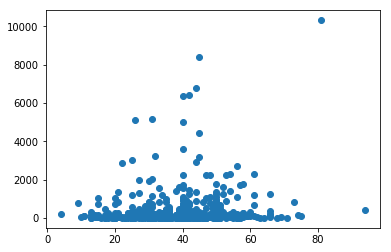

In [27]:
# Don't really have relationship. Buyers not that concerned about % savings?? Seems to peak at ~40%

plt.scatter(x=listings['percent_savings'],y=listings['Num_bought'])

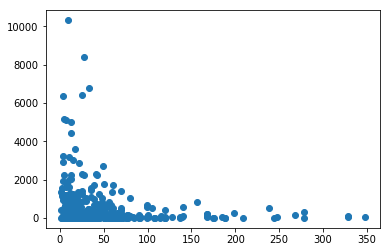

In [28]:
# Maybe buyers more concerned about the absolute price they have to pay- lower sale price generally = more sold

plt.scatter(x=listings['Sale Price'],y=listings['Num_bought'])

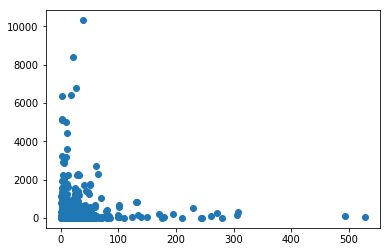

In [30]:
plt.scatter(x=listings['absolute_savings'],y=listings['Num_bought'])

In [32]:
# No. of unique companies

len(np.unique(listings['Company ID']))

352

(array([168.,  91.,  46.,  25.,  11.,   6.,   0.,   4.,   1.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <a list of 9 Patch objects>)

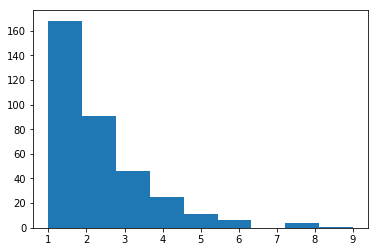

In [37]:
# Most companies only have 1 or 2 listings

plt.hist(x=pd.value_counts(listings['Company ID']),bins=9)

{'boxes': [<matplotlib.lines.Line2D at 0x115d840b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1157b7ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x115d87198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115d875c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x115d84080>,
  <matplotlib.lines.Line2D at 0x115d77e10>]}

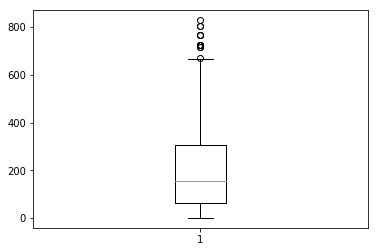

In [38]:
# Average age of listing seems to be slightly under 200 days old. IQR of 100 - 300 ish days

plt.boxplot(listings['Offer Age'])